In [13]:
import pandas as pd
import numpy as np

<Figure size 1000x800 with 0 Axes>

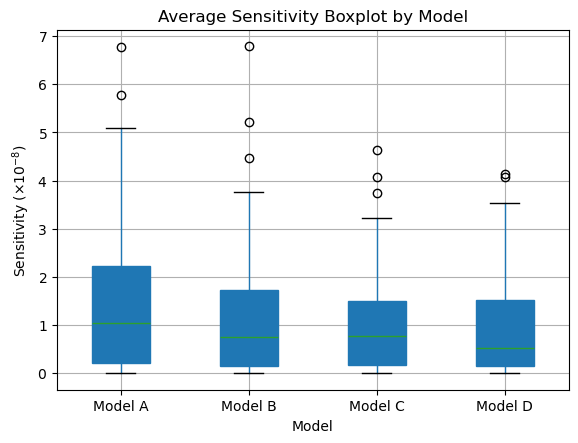

In [39]:
# Corrected code for creating a boxplot with specified colors for each model, without outliers

import matplotlib.pyplot as plt
import pandas as pd

# Load the data from CSV file (assuming it's correctly formatted)
# Load the data from CSV file
sensitivity_results = pd.read_csv('/Users/Lisa/Desktop/Master Thesis/RoofNetXAI/Notebooks/past_values_10_03_new/sensitivity_results_1000_mse_same.csv')
# Define function for formatting the y-axis labels to scientific notation
def format_ylabel(ax, label):
    # Use the ticklabel_format to force scientific notation
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.yaxis.major.formatter._useMathText = True
    plt.draw()
    
    # Get the offset text, which is the scientific notation exponent
    offset_text = ax.yaxis.get_offset_text().get_text()
    if offset_text:
        ax.yaxis.offsetText.set_visible(False)
        label_with_offset = f"{label} ({offset_text})"
    else:
        label_with_offset = label
    
    ax.set_ylabel(label_with_offset, fontsize=10)
    return ax

# Map model names for readability
model_name_mapping = {
    'sdr_kfold_shap_10_aplha03_25_1000_l1': 'Model A',
    'sir_intensity_total_shap_10_aplha03': 'Model B',
    'binary_classifier_sota_10': 'Model C',
    'sdr_average_10_aplha03_1000_l1': 'Model D'
}
sensitivity_results['model'] = sensitivity_results['model'].map(model_name_mapping)


# Create the boxplot and keep references to the artist elements
plt.figure(figsize=(10, 8))
boxplot_artists = sensitivity_results.boxplot(column='sensitivity', by='model', patch_artist=True, showfliers=True, return_type='dict')

ax = plt.gca()
format_ylabel(ax, "Sensitivity")

# Removing pandas automatic 'Grouped by' title and setting our own
plt.suptitle('')
plt.title('Average Sensitivity Boxplot by Model')

# Labeling the axes
plt.xlabel('Model')


# Display the plot
plt.show()


In [59]:

# Load the CSV file
file_path = '/Users/Lisa/Desktop/Master Thesis/RoofNetXAI/Notebooks/past_values_10_03_new/detailed_sensitivity_data_mse_same.csv'
data = pd.read_csv(file_path)

# Count the number of rows for each model type
row_counts = data['model_type'].value_counts()

# Print the counts
print(row_counts)

sir_intensity_total_shap_10_aplha03     33024
sdr_kfold_shap_10_aplha03_25_1000_l1    32760
sdr_average_10_aplha03_1000_l1          30410
binary_classifier_sota_10               25588
Name: model_type, dtype: int64


In [62]:
import pandas as pd

# Load the CSV file
file_path = '/Users/Lisa/Desktop/Master Thesis/RoofNetXAI/Notebooks/past_values_10_03_new/sensitivity_results_1000_mse_same.csv'
data = pd.read_csv(file_path)

# Group the data by model type and calculate the mean sensitivity
average_sensitivities = data.groupby('model')['sensitivity'].mean()

# Display the overall average sensitivities for each model
print(average_sensitivities)


model
binary_classifier_sota_10               1.032827e-08
sdr_average_10_aplha03_1000_l1          9.671734e-09
sdr_kfold_shap_10_aplha03_25_1000_l1    1.442337e-08
sir_intensity_total_shap_10_aplha03     1.123151e-08
Name: sensitivity, dtype: float64


In [53]:
# Define a function to compare original and perturbed predictions
def unchanged_predictions(row):
    # Extracting the first element from the nested lists
    original_pred = row['original_prediction'].strip('[]')
    perturbed_pred = row['perturbed_prediction'].strip('[]')
    return original_pred == perturbed_pred

# Apply the function to each row
data['predictions_unchanged'] = data.apply(unchanged_predictions, axis=1)

# Group by model_type and calculate the statistics for each group
grouped_data = data.groupby('model_type').agg(
    total_count=('predictions_unchanged', 'size'),
    unchanged_count=('predictions_unchanged', 'sum')
)

# Calculate the percentage of unchanged predictions
grouped_data['percentage_unchanged'] = (grouped_data['unchanged_count'] / grouped_data['total_count']) * 100

# Display the results
print(grouped_data)

                                      total_count  unchanged_count  \
model_type                                                           
binary_classifier_sota_10                   25588            10000   
sdr_average_10_aplha03_1000_l1              30410            10000   
sdr_kfold_shap_10_aplha03_25_1000_l1        32760            10000   
sir_intensity_total_shap_10_aplha03         33024            10000   

                                      percentage_unchanged  
model_type                                                  
binary_classifier_sota_10                        39.080819  
sdr_average_10_aplha03_1000_l1                   32.883920  
sdr_kfold_shap_10_aplha03_25_1000_l1             30.525031  
sir_intensity_total_shap_10_aplha03              30.281008  


<Figure size 1000x800 with 0 Axes>

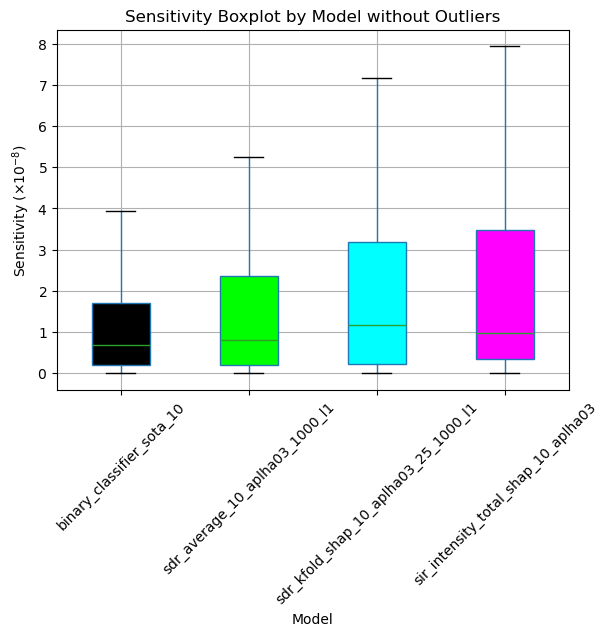

In [37]:
# Since the user requested to use the provided function and the previous code snippet to generate a boxplot, let's integrate them.
# This code will plot a boxplot of sensitivities grouped by model, without outliers, and with a scientific notation on the y-axis.

import matplotlib.pyplot as plt
import pandas as pd


# Load the data from CSV file
sensitivity_results = pd.read_csv('/Users/Lisa/Desktop/Master Thesis/RoofNetXAI/Notebooks/past_values_10_03_new/sensitivity_results_1000_mse_balanced.csv')

color_mapping = {
    'Model A': 'black',
    'Model B': 'lime',
    'Model C': 'cyan',
    'Model D': 'magenta'
}

# Define function for formatting the y-axis labels to scientific notation
def format_ylabel(ax, label):
    # Use the ticklabel_format to force scientific notation
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.yaxis.major.formatter._useMathText = True
    plt.draw()
    
    # Get the offset text, which is the scientific notation exponent
    offset_text = ax.yaxis.get_offset_text().get_text()
    if offset_text:
        ax.yaxis.offsetText.set_visible(False)
        label_with_offset = f"{label} ({offset_text})"
    else:
        label_with_offset = label
    
    ax.set_ylabel(label_with_offset, fontsize=10)
    return ax

plt.figure(figsize=(10, 8))

# Create the boxplot with patch_artist=True to fill with color
boxplot_dict = sensitivity_results.boxplot(column='sensitivity', by='model', patch_artist=True, showfliers=False, return_type='dict')

# Coloring each box according to the color mapping
for box, color in zip(boxplot_dict['sensitivity']['boxes'], color_mapping.values()):
    box.set_facecolor(color)

ax = plt.gca()
format_ylabel(ax, "Sensitivity")

plt.title('Sensitivity Boxplot by Model without Outliers')
plt.xlabel('Model')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.suptitle('')  # Remove automatic 'Grouped by' title

plt.show()


In [49]:
import pandas as pd

# Load the CSV file
file_path = '/Users/Lisa/Desktop/Master Thesis/RoofNetXAI/Notebooks/past_values_10_03_new/detailed_sensitivity_data_mse_balanced.csv'
data = pd.read_csv(file_path)

# Get the number of cases in the baseline classifier
num_cases_baseline = data[data['model_type'] == 'binary_classifier_sota_10'].shape[0]

# Calculate average sensitivity for the same number of cases for each model
average_sensitivities = {}
for model in data['model_type'].unique():
    model_data = data[data['model_type'] == model]
    
    # If the model has more cases than the baseline, randomly sample to match
    if len(model_data) > num_cases_baseline:
        model_data = model_data.sample(n=num_cases_baseline, random_state=35)  # random_state for reproducibility
    
    # Calculate the average sensitivity
    average_sensitivity = model_data['mse_shap'].mean()
    average_sensitivities[model] = average_sensitivity

# Display the average sensitivities
for model, avg_sens in average_sensitivities.items():
    print(f"Model {model}: Average Sensitivity = {avg_sens}")


Model sdr_kfold_shap_10_aplha03_25_1000_l1: Average Sensitivity = 1.3210002439024568e-08
Model sir_intensity_total_shap_10_aplha03: Average Sensitivity = 1.1936205636989731e-08
Model binary_classifier_sota_10: Average Sensitivity = 5.583821443647436e-09
Model sdr_average_10_aplha03_1000_l1: Average Sensitivity = 8.317123051277832e-09


In [51]:
import pandas as pd

# Load the CSV file
file_path = '/Users/Lisa/Desktop/Master Thesis/RoofNetXAI/Notebooks/past_values_10_03_new/detailed_sensitivity_data_mse_balanced.csv'
data = pd.read_csv(file_path)


# Calculate average sensitivity for the same number of cases for each model
average_sensitivities = {}
overall_mean_sensitivities = {}
for model in data['model_type'].unique():
    model_data = data[data['model_type'] == model]
    
    # Calculate the average sensitivity for all instances
    overall_mean_sensitivity = model_data['mse_shap'].mean()
    overall_mean_sensitivities[model] = overall_mean_sensitivity
    
    # If the model has more cases than the baseline, randomly sample to match
    if len(model_data) > num_cases_baseline:
        model_data = model_data.sample(n=num_cases_baseline, random_state=35)  # random_state for reproducibility
    
    # Calculate the average sensitivity for the matched subset
    average_sensitivity = model_data['mse_shap'].mean()
    average_sensitivities[model] = average_sensitivity

# Display the average sensitivities
print("Average Sensitivities with the Same Number of Cases as Baseline Classifier:")
for model, avg_sens in average_sensitivities.items():
    print(f"Model {model}: Average Sensitivity = {avg_sens}")

print("\nOverall Mean Sensitivities for All Models:")
for model, overall_avg_sens in overall_mean_sensitivities.items():
    print(f"Model {model}: Overall Mean Sensitivity = {overall_avg_sens}")



Overall Mean Sensitivities for All Models:
Model sdr_kfold_shap_10_aplha03_25_1000_l1: Overall Mean Sensitivity = 1.0238802567763117e-08
Model sir_intensity_total_shap_10_aplha03: Overall Mean Sensitivity = 8.243934114307867e-09
Model binary_classifier_sota_10: Overall Mean Sensitivity = 5.9913262912327006e-09
Model sdr_average_10_aplha03_1000_l1: Overall Mean Sensitivity = 7.175980465657599e-09
